carbon_monoxide --> co_conc
sulphur_dioxide --> so2_conc
nitrogen_dioxide --> no2_conc   
ozone --> o3_conc
particulate_matter_2.5um --> pm2p5_conc
pm10_wildfires  -->  pmwf_conc  

nitrogen_monoxide --> no_conc

In [15]:
from myFunctions import getSum, getSum2, DIYColorMap
# from matplotlib import colors
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

In [2]:
ds_name = 'cams-europe-air-quality-forecasts'  # dataset name
ds_time = '2022-01-01/2022-01-01'  
# ds_time = '2021-01-01/2021-12-31'  # year sum

# dataset variable; should let users input this variable
ds_variable = 'ozone'


[mean_data, latitude, longitude, rdata]= getSum.getSum_mean(ds_name=ds_name, ds_time=ds_time, ds_variable=ds_variable)
#[foo, rdata] = getSum2.getSum_day(ds_name=ds_name, ds_time=ds_time, ds_variable=ds_variable)

2022-06-05 10:04:31,605 INFO Welcome to the CDS
2022-06-05 10:04:31,605 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-europe-air-quality-forecasts
2022-06-05 10:04:31,677 INFO Request is queued
2022-06-05 10:04:32,753 INFO Request is running
2022-06-05 10:04:34,354 INFO Request is completed
2022-06-05 10:04:34,354 INFO Downloading https://download-0001-ads-clone.copernicus-climate.eu/cache-compute-0001/cache/data5/adaptor.cams_regional_fc.retrieve-1654416271.1921403-7479-9-956c2ce3-403a-4fb8-afd1-90124da88abd.nc to download.nc (26.9M)
2022-06-05 10:04:35,964 INFO Download rate 16.7M/s  


In [24]:
# rdata.o3_conc.values
mean_data.shape

(420, 700)

In [4]:
print(mean_data)

[[72.68624  73.41692  74.1404   ... 68.21549  68.19914  68.15911 ]
 [74.01086  74.64284  75.64714  ... 68.02526  68.04197  68.02383 ]
 [75.245544 76.004326 76.58191  ... 67.65346  67.7001   67.54788 ]
 ...
 [74.3401   73.948296 73.57196  ... 74.36919  73.829185 72.19562 ]
 [73.95799  73.535484 73.11974  ... 73.750885 73.57691  71.72027 ]
 [73.90038  73.2989   73.037384 ... 71.32827  71.616425 71.09807 ]]


In [27]:
# c = mean_data(mean_data["longitude"] > 72)
# print(c)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

The daily threshold of ozone is 70 μg/m3


c:\Users\m1865\.conda\envs\APICDS\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\Users\m1865\.conda\envs\APICDS\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
c:\Users\m1865\.conda\envs\APICDS\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
c:\Users\m1865\.conda\envs\APICDS\lib\site-p

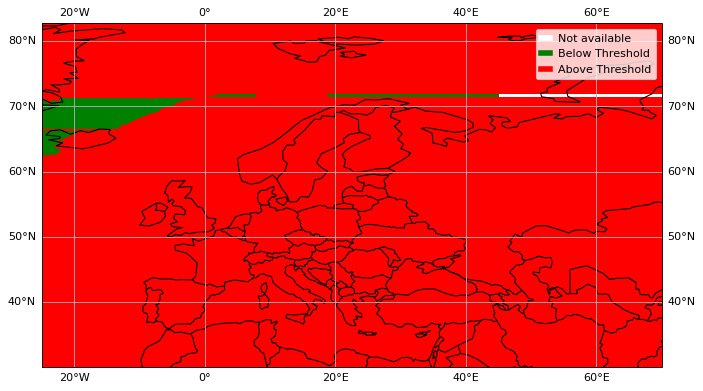

In [16]:
# The comments below is just a simplified custom colormap without importing from another .py file. Just use to test. 

# # Modified from https://stackoverflow.com/questions/9707676/defining-a-discrete-colormap-for-imshow-in-matplotlib
# # Define a custom colormap. 
# cmap = colors.ListedColormap(['green', 'red'])
# bounds=[0,70,100]
# norm = colors.BoundaryNorm(bounds, cmap.N)

# Should let users to input GoodColor, BadColor, d_timescale these three formal parameters. Check DIYColorMap.py for more information. 
GoodColor = 'green'
BadColor = 'red'
d_timescale = 'Daily'

cmap = DIYColorMap.ColorMap_Color(GoodColor=GoodColor,BadColor=BadColor)
bounds = DIYColorMap.ColorMap_Threshold(ds_variable=ds_variable,d_timescale=d_timescale)
norm = DIYColorMap.ColorMap_Norm(d_bounds=bounds,d_cmap=cmap)
threshold = bounds[1]

print("The daily threshold of " + ds_variable + " is " + str(threshold) + " μg/m3")

plt.figure(figsize=(10, 10), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())

img = plt.contourf(longitude, latitude, mean_data, cmap=cmap, norm=norm,
             transform=ccrs.PlateCarree())

# # Colorbar (Not possible to force equally divide the colorbar, for example, 0-70 with the same height as 70-100 in colorbar)
# plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, threshold, 100])

# # Eliminate the overlapping between colorbar and output plot
# plt.colorbar(img,fraction=0.046, pad=0.06)

# # Legends
# # From https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html

# Option 1: Below use marks (Not good result hence abandoned)

# legend_elements = [
#                     Line2D([0], [0], marker='o', color='w', label='Below Threshold', markerfacecolor=GoodColor, markersize=5),
#                     Line2D([0], [0], marker='o', color='w', label='Above Threshold', markerfacecolor=BadColor, markersize=5)
#                           ]

# Option 2: Use line and set linewidth and linelength

legend_elements = [ Line2D([0], [0], color='w', label='Not available', linewidth=5),
                    Line2D([0], [0], color=GoodColor, label='Below Threshold', linewidth=5),
                    Line2D([0], [0], color=BadColor, label='Above Threshold', linewidth=5)
                          ]

ax.legend(handles=legend_elements,handlelength=0.8)

ax.set_extent([70,-25,30,80])
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# # Below use colored world basemap, but the result colormap will completely overwrite the basemap. 
# ax.stock_img()

ax.gridlines(draw_labels=True)

plt.show()